# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [108]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2022-11-19 00:14:58--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 58374 (57K) [text/plain]
Сохранение в: «car_data.csv.5»

car_data.csv.5      100%[===================>]  57,01K  --.-KB/s    за 0,03s   

2022-11-19 00:14:59 (2,09 MB/s) - «car_data.csv.5» сохранён [58374/58374]



In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [110]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,222,100,50,81,197,67,6,186,34,22,158,206,531,198,74,6,1,197,198
1,221,88,44,85,139,56,11,157,43,20,155,176,363,175,76,5,16,184,195
2,73,73,37,53,111,54,6,126,55,18,128,135,227,147,82,1,15,176,184
3,152,93,35,72,172,62,7,149,44,19,124,169,334,125,62,5,30,203,210
4,281,82,43,73,154,65,7,151,44,19,143,178,341,160,76,5,11,185,189
5,801,84,38,60,128,56,5,132,50,18,130,148,261,141,75,8,4,185,188
6,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
7,456,92,43,70,124,52,6,139,49,18,144,164,282,172,79,4,16,183,185
8,578,92,46,82,170,58,8,165,40,20,149,181,409,164,61,8,11,200,208
9,24,99,53,105,219,66,11,204,32,23,165,221,623,224,68,0,6,191,201


Methods `describe` and `info` deliver some useful information.

In [111]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,416.754098,93.912568,44.961749,82.735883,169.726776,61.657559,8.703097,170.061931,40.630237,20.663024,148.333333,190.054645,446.096539,175.449909,72.630237,6.309654,12.391621,188.969035,195.644809
std,243.647929,8.304185,6.218966,15.852232,34.334630,8.565934,5.021597,33.135254,7.784734,2.569707,14.602644,31.756152,176.522914,33.082067,8.020951,4.839270,8.862164,6.186056,7.480112
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,215.000000,87.000000,40.000000,70.000000,140.000000,56.000000,7.000000,148.000000,33.000000,19.000000,138.000000,168.000000,321.000000,151.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,411.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,158.000000,43.000000,20.000000,146.000000,180.000000,368.000000,174.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,626.000000,100.000000,50.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,218.000000,602.000000,200.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [112]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Надо отнормировать данные,
а также добавить столбец свободных членов (потому что модель линейная)

In [113]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_pd = pd.DataFrame(scaler.fit_transform(X_train))
X_test_pd = pd.DataFrame(scaler.fit_transform(X_test))


In [114]:

X_train_pd["bias term"] = np.ones(X_train_pd.shape[0])
X_test_pd["bias term"] = np.ones(X_test_pd.shape[0])
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,bias term
0,-0.800055,0.733724,0.810882,-0.109604,0.795060,0.624253,-0.538785,0.481439,-0.852474,0.520758,0.662584,0.502577,0.481416,0.682263,0.170929,-0.064046,-1.286594,1.299421,0.315148,1.0
1,-0.804163,-0.712648,-0.154789,0.142957,-0.895737,-0.661074,0.457822,-0.394560,0.304689,-0.258251,0.456955,-0.442984,-0.471170,-0.013612,0.420503,-0.270877,0.407538,-0.803996,-0.086282,1.0
2,-1.412151,-2.520613,-1.281404,-1.877528,-1.711984,-0.894770,-0.538785,-1.330973,1.847574,-1.037259,-1.393712,-1.735250,-1.242311,-0.860764,1.169227,-1.098202,0.294596,-2.098407,-1.558189,1.0
3,-1.087617,-0.109993,-1.603294,-0.677865,0.066268,0.040014,-0.339464,-0.636215,0.433263,-0.647755,-1.667885,-0.663615,-0.635605,-1.526383,-1.326517,-0.270877,1.988728,2.270229,1.920865,1.0
4,-0.557681,-1.435834,-0.315734,-0.614725,-0.458462,0.390557,-0.339464,-0.575801,0.433263,-0.647755,-0.365564,-0.379946,-0.595913,-0.467444,0.420503,-0.270877,-0.157173,-0.642195,-0.889140,1.0
5,1.578492,-1.194772,-1.120459,-1.435547,-1.216405,-0.661074,-0.738107,-1.149731,1.204705,-1.037259,-1.256625,-1.325507,-1.049526,-1.042297,0.295716,0.349616,-0.947768,-0.642195,-1.022950,1.0
6,1.664761,0.131069,-0.637624,-0.046464,0.007965,0.390557,0.059179,-0.757042,0.690410,-0.647755,-0.228477,-0.852727,-0.749008,-1.072552,-1.076943,-0.477708,-0.495999,1.623023,1.519435,1.0
7,0.161223,-0.230524,-0.315734,-0.804145,-1.333012,-1.128466,-0.538785,-0.938283,1.076131,-1.037259,-0.297021,-0.821208,-0.930453,-0.104378,0.794865,-0.477708,0.407538,-0.965798,-1.424379,1.0
8,0.662402,-0.230524,0.167101,-0.046464,0.007965,-0.427378,-0.140142,-0.152905,-0.081032,-0.258251,0.045695,-0.285390,-0.210343,-0.346422,-1.451305,0.349616,-0.157173,1.784825,1.653245,1.0
9,-1.613444,0.613193,1.293717,1.405759,1.436397,0.507405,0.457822,1.025163,-1.109621,0.910262,1.142387,0.975357,1.003070,1.468904,-0.577794,-1.305033,-0.721883,0.328613,0.716577,1.0


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [116]:
import warnings
warnings.filterwarnings('ignore')

In [166]:
    
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)   
param_grid = {'C': [0.01, 0.05, 0.1, 0.2, 0.4, 0.7, 1, 2, 4] 
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5
grid_result = grid.fit(X_train, y_train)
print('Best parameters: ', grid_result.best_params_)

Best parameters:  {'C': 0.01}


In [167]:
C = 0.01


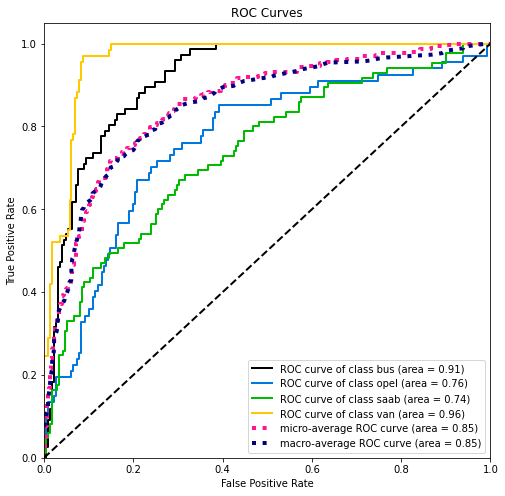

In [168]:
import scikitplot

model = LogisticRegression(C=C, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train_pd, y_train)

y_predicted_proba = model.predict_proba(X_test_pd)
scikitplot.metrics.plot_roc(y_test, y_predicted_proba, figsize=(8, 8))
plt.show()

Модель лучше всего предсказывает van и bus.

In [122]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [123]:
from sklearn.decomposition import PCA

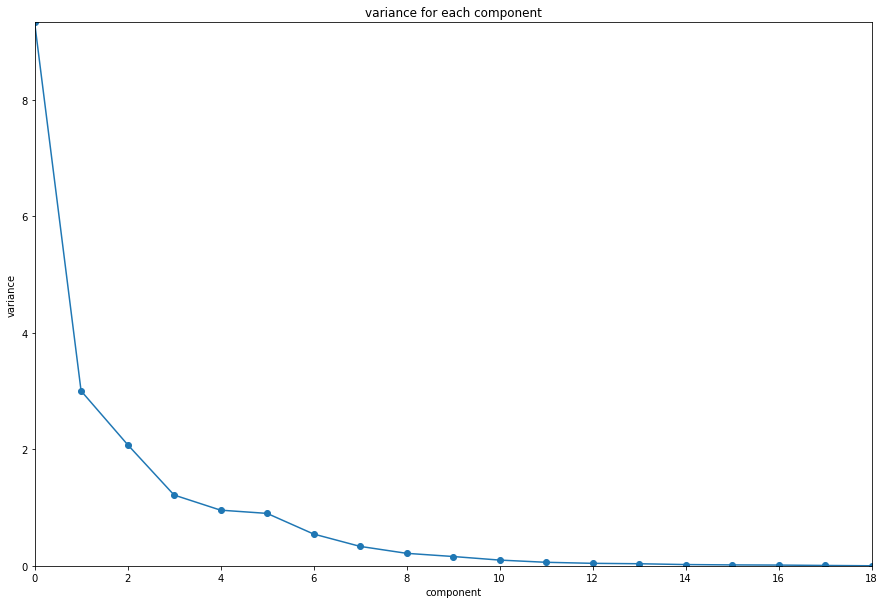

In [124]:
pca = PCA()
pca.fit(X_train_pd)
explained_variance = pca.explained_variance_

plt.figure(figsize = (15, 10))
plt.plot(np.arange(0, len(explained_variance)), explained_variance, "-o")
plt.xlim((0, X_train.shape[1] - 1))
plt.ylim((0, np.max(explained_variance)))
plt.xlabel('component')
plt.ylabel('variance')
plt.title('variance for each component')
plt.xticks(np.arange(0, X_train_pd.shape[1], 2))

plt.show()

Из графикa видно, что большая часть дисперсии содержится в первых 8-10 компонентах

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [125]:
import plotly.express as px

X = np.copy(X_train_pd)

pca = PCA()
pca.fit(X)

for i in range(1, X.shape[1]):
    percent = 100 * pca.explained_variance_ratio_[:i].sum().round(2)
    print(f'{i} components cover {percent}% of variance')

1 components cover 49.0% of variance
2 components cover 65.0% of variance
3 components cover 76.0% of variance
4 components cover 82.0% of variance
5 components cover 87.0% of variance
6 components cover 92.0% of variance
7 components cover 95.0% of variance
8 components cover 97.0% of variance
9 components cover 98.0% of variance
10 components cover 98.0% of variance
11 components cover 99.0% of variance
12 components cover 99.0% of variance
13 components cover 100.0% of variance
14 components cover 100.0% of variance
15 components cover 100.0% of variance
16 components cover 100.0% of variance
17 components cover 100.0% of variance
18 components cover 100.0% of variance
19 components cover 100.0% of variance


Видно, что 99 процентов дисперсии содержется в 11 компонентах. Оставим их

In [126]:
components = 11
my_PCA  = PCA(n_components=components)
X_train_pca = my_PCA.fit_transform(X_train)
X_test_pca = my_PCA.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [127]:
model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=1000)
param_grid = {'C': [0.001, 0.01, 0.1, 1.0, 10, 20, 30, 50, 100, 200, 500, 1000] }
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_result = grid.fit(X_train_pca, y_train)

print('Best score: ', grid_result.best_score_)
print('Best parameters: ', grid_result.best_params_)

Best score:  0.6702919099249375
Best parameters:  {'C': 0.1}


Наибольшая оценка достигается при C = 0.1

In [128]:
C = 0.1

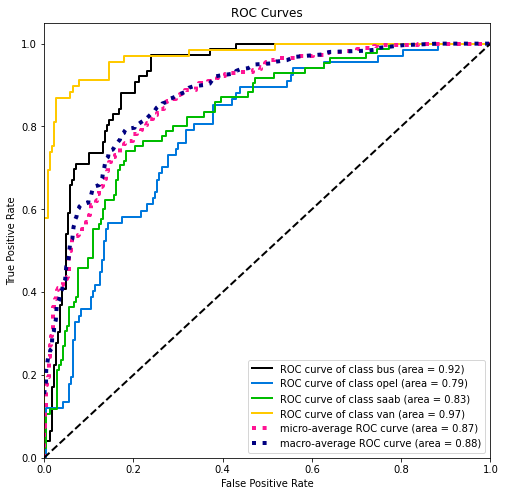

In [129]:
model = LogisticRegression(C=C, multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
model.fit(X_train_pca, y_train)

X_test_transform = pca.transform(X_test_pd)

y_predicted_proba = model.predict_proba(X_test_pca)
scikitplot.metrics.plot_roc(y_test, y_predicted_proba, figsize=(8, 8))
plt.show()

van предсказывается так же хорошо, остальное похуже, но зато удалось сократить количество столбцов почти в 2 раза.


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [130]:
from sklearn.tree import DecisionTreeClassifier


In [131]:
tree_model = DecisionTreeClassifier()

In [132]:
param_grid = {'max_depth' : np.linspace(1, 20, 20)}

clf = GridSearchCV(estimator=tree_model, param_grid=param_grid)
best_clf = clf.fit(X_train_pca, y_train)
best_tree = best_clf.best_estimator_
print('optimal tree depth = {}'.format(best_tree.get_depth()))

optimal tree depth = 13


In [133]:
depth = 13

In [134]:
tree = DecisionTreeClassifier(max_depth=depth)
tree.fit(X_train, y_train)

lr_predictions = tree.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

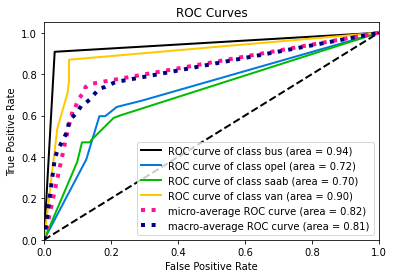

In [135]:
scikitplot.metrics.plot_roc(y_test, lr_predictions)

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [136]:
from sklearn.ensemble import BaggingClassifier

In [137]:
N_array = [i * 5 + 2 for i in range(20)] + [100]


In [138]:
base_estimator = LogisticRegression(multi_class="multinomial", solver="saga", tol=1e-3, max_iter=500, C = 10)

base_estimator_tree = DecisionTreeClassifier(max_depth = 13)

In [139]:
acc_scores_log = []
acc_scores_tree = []
f1_scores_log = []
f1_scores_tree = []

for n in N_array:
        model_log = BaggingClassifier(base_estimator, n)
        model_tree = BaggingClassifier(base_estimator_tree, n)
        
        model_log.fit(X_train, y_train)
        model_tree.fit(X_train, y_train)
        
        y_pred_log = model_log.predict(X_test)
        y_pred_tree = model_tree.predict(X_test)
        
        acc_scores_log.append(accuracy_score(y_test, y_pred_log))
        acc_scores_tree.append(accuracy_score(y_test, y_pred_tree))
        
        f1_scores_log.append(f1_score(y_test, y_pred_log, average="macro"))
        f1_scores_tree.append(f1_score(y_test, y_pred_tree, average="macro"))

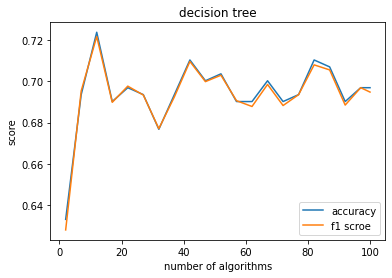

In [148]:
plt.plot(N_array, np.array(acc_scores_tree), label='accuracy')
plt.plot(N_array, np.array(f1_scores_tree), label='f1 scroe')
plt.legend()
plt.xlabel('number of algorithms')
plt.ylabel('score')
plt.title('decision tree')
plt.show()

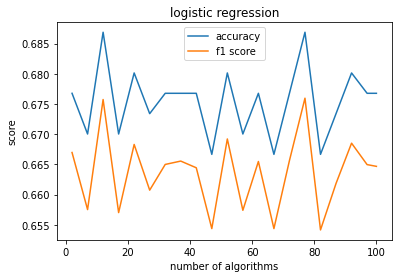

In [147]:
plt.plot(N_array, np.array(acc_scores_log), label='accuracy')
plt.plot(N_array, np.array(f1_scores_log), label='f1 score')
plt.legend()
plt.xlabel('number of algorithms')
plt.ylabel('score')
plt.title('logistic regression')
plt.show()

Decision tree shwos the best result when number of algorithms is around 12. Logistic regression is also better when number of algorithms is around 12 and also when number of algorithms is around 75

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [140]:
from sklearn.ensemble import RandomForestClassifier

f1_metrics.clear()
accuracy_metrics.clear()
N_grid = np.arange(1, 200, 10)

for N in N_grid:
    trained_model = RandomForestClassifier(n_estimators=N)
    trained_model.fit(X_train, y_train)
    y_pred = trained_model.predict(X_test)
    
    f1_metrics.append(f1_score(y_test, y_pred, average='macro'))
    accuracy_metrics.append(accuracy_score(y_test, y_pred))

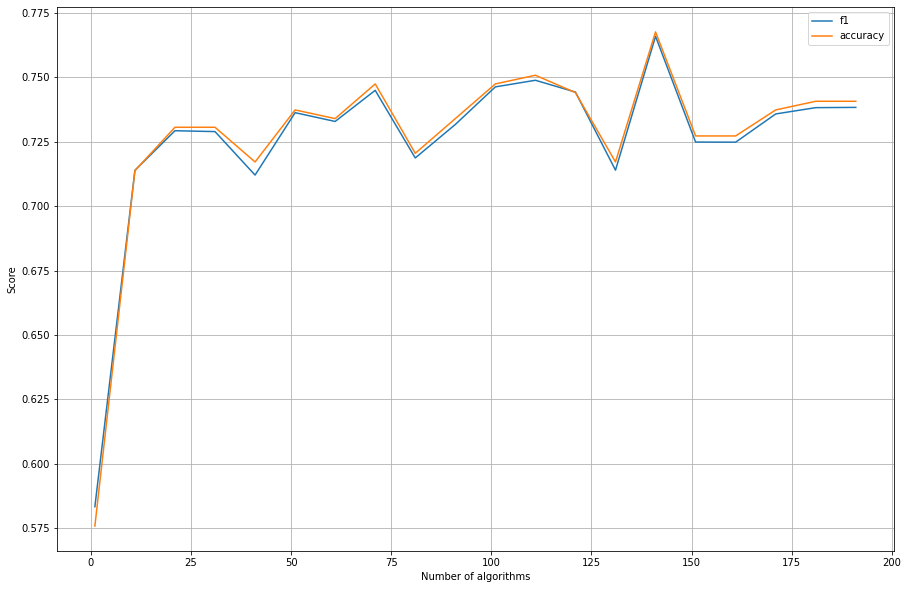

In [150]:
plt.figure(figsize=(15, 10))
plt.plot(N_grid, f1_metrics, label='f1')
plt.plot(N_grid, accuracy_metrics, label='accuracy')
plt.xlabel('Number of algorithms')
plt.ylabel('Score')
plt.legend()
plt.grid(True)

Maximum of accuracy and f1 metrics is when number of algorithms is 140

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 